# Sentiment Analysis and Prediction

Sentiment analysis is the process of understanding the opinion of an author about a subject.
Examples include analyzing movie ratings, amazon product reviews or the analysis of Twitter tweet sentiment.

For the purposes of this analysis we will:
- Explore our data
- Transform sentiment carrying columns
- Predict sentiment with a supervised machine learning model

In [1]:
%%capture
pip install wordcloud

In [2]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
    CountVectorizer,
    ENGLISH_STOP_WORDS,
)
from wordcloud import WordCloud
from functools import reduce
from nltk import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Load your data
Upload data that has textual value and an indication of the sentiment (0 = negative, 1 = positive)

In [3]:
# Upload your data as CSV and load as a data frame
df = pd.read_csv('reviews.csv',index_col=0)
df

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."
...,...,...
9995,1,A revelation of life in small town America in...
9996,1,Great biography of a very interesting journal...
9997,0,Interesting Subject; Poor Presentation: You'd...
9998,0,Don't buy: The box looked used and it is obvi...


# 2. Word cloud and feature creation
Visualize words that carry meaning with a word cloud

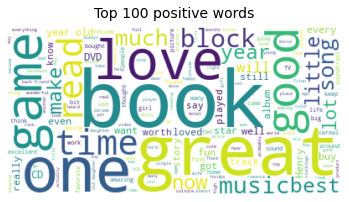

In [4]:
positive_df = df[df["score"] == 1]["review"][:100]  # 1 = positive, 0 = negative
positive_df = reduce(lambda a, b: a + b, positive_df)

# Create and generate a word cloud image
cloud_positives = WordCloud(background_color="white").generate(positive_df)

# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation="bilinear")
plt.title("Top 100 positive words", y=1.02, size=14)  # Choose title, position and size
plt.axis("off")  # Turn off axis labels

# Don't forget to show the final image
plt.show()

In [5]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in df["review"]]

# Create a new feature for the lengh of each review
df["n_words"] = [len(word_tokens[i]) for i in range(len(word_tokens))]

df

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...
9995,1,A revelation of life in small town America in...,175
9996,1,Great biography of a very interesting journal...,153
9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,0,Don't buy: The box looked used and it is obvi...,33


# 3. Building a vectorizer
Use the Tfidf Vectorizer to transform the data into numerical values that can be used to make predictions. 

In [6]:
# Build the vectorizer
vect = TfidfVectorizer(
    stop_words=ENGLISH_STOP_WORDS,  # Default list of English stop words
    ngram_range=(1, 2),  # Consider Uni- and Bi-grams
    max_features=200,  # Max number of features
    token_pattern=r"\b[^\d\W][^\d\W]+\b",  # Capture only words using this pattern
)  

vect.fit(df.review)

# Create sparse matrix from the vectorizer
X = vect.transform(df.review)

# Create a DataFrame
df_transformed = pd.DataFrame(data=X.toarray(), columns=vect.get_feature_names_out())
df_transformed

,able,action,actually,ago,album,amazing,amazon,author,away,bad,...,work,works,world,worst,worth,writing,written,wrong,year,years
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.274041,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,0.0,0.0,0.0,0.0,0.0,0.382773,0.000000,0.000000,0.000000,0.0,...,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.308646,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.143748,0.0,0.0,0.0,0.0,0.000000
9996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211433,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.261721,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


# 4. Building a classifier
Use a logistic regression to predict the sentiment of unseen data. 
Visualize the errors your classifier makes with a confusion matrix.

In [7]:
dropped = df.drop(["review", "n_words"], axis=1)
transformed = pd.concat([dropped, df_transformed], axis=1)
transformed

,score,able,action,actually,ago,album,amazing,amazon,author,away,...,work,works,world,worst,worth,writing,written,wrong,year,years
0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.274041,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,1,0.0,0.0,0.0,0.0,0.0,0.382773,0.000000,0.000000,0.000000,...,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.308646,0.000000,...,0.000000,0.0,0.0,0.0,0.143748,0.0,0.0,0.0,0.0,0.000000
9996,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211433,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9997,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.261721,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9998,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [8]:
# Define X and y
y = transformed["score"]
X = transformed.drop("score", axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # Set size of test_set
    random_state=456,  # Random seed for reproducibility
)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print("Accuracy on the test set: ", accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted) / len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]


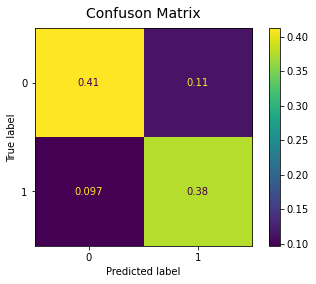

In [9]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, normalize="all")
plt.title("Confuson Matrix", y=1.02, size=14)
plt.show()